In [1]:
import pandas as pd
import re
import string

In [2]:
data_new = pd.read_csv('/content/sentiment_labels.csv', encoding= 'ISO-8859–1')
print(len(data_new), 'tweets')
data_new.head()

90562 tweets


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,3,6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,location,text,hashtags,text_vader,preprocess_data,Compound,Positive,Negative,Neutral,label_vader,flair_label,Polarity,Subjectivity,Polarity Scores,Country,Topic
0,0,NaN,russian artillery entered a battle with McDona...,[],russian artillery entered a battle with McDona...,russian aillery entered a battle with mcdonald...,-0.802,0.000,0.427,0.573,Negative,Negative,0.00,0.0,Neutral,unknown,4.0
1,1,Delhi,Shades of grey #War #MausMusings #Kharkiv #Ukr...,"['War', 'MausMusings', 'Kharkiv', 'Ukraine']",Shades of grey #War #MausMusings #Kharkiv #Ukr...,shades of grey,-0.5719,0.119,0.386,0.495,Negative,Negative,-0.05,0.1,Negative,IN,0.0
2,2,NaN,1.) You are embedded with the Ã¢ÂÂKrakenÃ¢Â...,[],1.) You are embedded with the Ã¢ÂÂKrakenÃ¢Â...,1 you are embedded with the kraken wing of azo...,0.128,0.122,0.092,0.786,Positive,Negative,0.00,0.0,Neutral,unknown,0.0
3,3,NaN,"In Kharkiv, after shelling in Saltivka, two hi...",[],"In Kharkiv, after shelling in Saltivka, two hi...",in kharkiv after shelling in saltivka two high...,-0.0772,0.093,0.107,0.8,Negative,Negative,0.00,0.0,Neutral,unknown,4.0
4,4,Newyork,The activities carried out by the United State...,"['ETH', 'France', 'BSC']",The activities carried out by the United State...,the activities carried out by the united state...,-0.0772,0.067,0.074,0.859,Negative,Negative,-0.35,0.5,Negative,unknown,4.0


In [3]:
data_new['Polarity Scores'].value_counts()

Neutral     38349
Positive    31629
Negative    20580
Name: Polarity Scores, dtype: int64

In [4]:
data_new['flair_label'].value_counts()

Negative    58049
Positive    32487
Name: flair_label, dtype: int64

In [5]:
data_new['label_vader'].value_counts()

Negative    43447
Positive    29306
Neutral     17805
unknown         1
Name: label_vader, dtype: int64

In [3]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

In [13]:
a= encode_and_bind(data_new, 'label_vader')

In [15]:
a["Topic"] = pd.to_numeric(a["Topic"] )


In [32]:
data_new.head()

,Unnamed: 0,location,text,hashtags,text_vader,preprocess_data,Compound,Positive,Negative,Neutral,label_vader,flair_label,Polarity,Subjectivity,Polarity Scores,Country,Topic
0,0,NaN,russian artillery entered a battle with McDona...,[],russian artillery entered a battle with McDona...,russian aillery entered a battle with mcdonald...,-0.802,0.000,0.427,0.573,Negative,Negative,0.00,0.0,Neutral,unknown,4.0
1,1,Delhi,Shades of grey #War #MausMusings #Kharkiv #Ukr...,"['War', 'MausMusings', 'Kharkiv', 'Ukraine']",Shades of grey #War #MausMusings #Kharkiv #Ukr...,shades of grey,-0.5719,0.119,0.386,0.495,Negative,Negative,-0.05,0.1,Negative,IN,0.0
2,2,NaN,1.) You are embedded with the Ã¢ÂÂKrakenÃ¢Â...,[],1.) You are embedded with the Ã¢ÂÂKrakenÃ¢Â...,1 you are embedded with the kraken wing of azo...,0.128,0.122,0.092,0.786,Positive,Negative,0.00,0.0,Neutral,unknown,0.0
3,3,NaN,"In Kharkiv, after shelling in Saltivka, two hi...",[],"In Kharkiv, after shelling in Saltivka, two hi...",in kharkiv after shelling in saltivka two high...,-0.0772,0.093,0.107,0.8,Negative,Negative,0.00,0.0,Neutral,unknown,4.0
4,4,Newyork,The activities carried out by the United State...,"['ETH', 'France', 'BSC']",The activities carried out by the United State...,the activities carried out by the united state...,-0.0772,0.067,0.074,0.859,Negative,Negative,-0.35,0.5,Negative,unknown,4.0


In [16]:
a.head()

,Unnamed: 0,location,text,hashtags,text_vader,preprocess_data,Compound,Positive,Negative,Neutral,...,flair_label,Polarity,Subjectivity,Polarity Scores,Country,Topic,label_vader_Negative,label_vader_Neutral,label_vader_Positive,label_vader_unknown
0,0,NaN,russian artillery entered a battle with McDona...,[],russian artillery entered a battle with McDona...,russian aillery entered a battle with mcdonald...,-0.802,0.000,0.427,0.573,...,Negative,0.00,0.0,Neutral,unknown,4.0,1,0,0,0
1,1,Delhi,Shades of grey #War #MausMusings #Kharkiv #Ukr...,"['War', 'MausMusings', 'Kharkiv', 'Ukraine']",Shades of grey #War #MausMusings #Kharkiv #Ukr...,shades of grey,-0.5719,0.119,0.386,0.495,...,Negative,-0.05,0.1,Negative,IN,0.0,1,0,0,0
2,2,NaN,1.) You are embedded with the Ã¢ÂÂKrakenÃ¢Â...,[],1.) You are embedded with the Ã¢ÂÂKrakenÃ¢Â...,1 you are embedded with the kraken wing of azo...,0.128,0.122,0.092,0.786,...,Negative,0.00,0.0,Neutral,unknown,0.0,0,0,1,0
3,3,NaN,"In Kharkiv, after shelling in Saltivka, two hi...",[],"In Kharkiv, after shelling in Saltivka, two hi...",in kharkiv after shelling in saltivka two high...,-0.0772,0.093,0.107,0.8,...,Negative,0.00,0.0,Neutral,unknown,4.0,1,0,0,0
4,4,Newyork,The activities carried out by the United State...,"['ETH', 'France', 'BSC']",The activities carried out by the United State...,the activities carried out by the united state...,-0.0772,0.067,0.074,0.859,...,Negative,-0.35,0.5,Negative,unknown,4.0,1,0,0,0


In [21]:
a = pd.get_dummies(a.Topic, prefix='Topic')
print(a.head())

   Topic_0.0  Topic_1.0  Topic_2.0  Topic_3.0  Topic_4.0  Topic_5.0
0          0          0          0          0          1          0
1          1          0          0          0          0          0
2          1          0          0          0          0          0
3          0          0          0          0          1          0
4          0          0          0          0          1          0


In [24]:
b =  pd.get_dummies(data_new.label_vader, prefix='Vader')
print(b.head())

   Vader_Negative  Vader_Neutral  Vader_Positive  Vader_unknown
0               1              0               0              0
1               1              0               0              0
2               0              0               1              0
3               1              0               0              0
4               1              0               0              0


In [28]:
new = pd.concat([a, b], axis=1)

In [29]:
new.head()

,Topic_0.0,Topic_1.0,Topic_2.0,Topic_3.0,Topic_4.0,Topic_5.0,Vader_Negative,Vader_Neutral,Vader_Positive,Vader_unknown
0,0,0,0,0,1,0,1,0,0,0
1,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0


In [30]:
del new['Vader_unknown']

In [31]:
new.head()

,Topic_0.0,Topic_1.0,Topic_2.0,Topic_3.0,Topic_4.0,Topic_5.0,Vader_Negative,Vader_Neutral,Vader_Positive
0,0,0,0,0,1,0,1,0,0
1,1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,1,0,0
4,0,0,0,0,1,0,1,0,0


In [37]:
CrosstabResult=pd.crosstab(index=data_new['Topic'],columns=data_new['label_vader'])
print(CrosstabResult)

label_vader  Negative  Neutral  Positive
Topic                                   
0.0              6361     3325      3384
1.0             12534     3815     12939
2.0              7149     2918      5287
3.0              4988     2373      3632
4.0              9362     3792      2693
5.0              3053     1582      1371


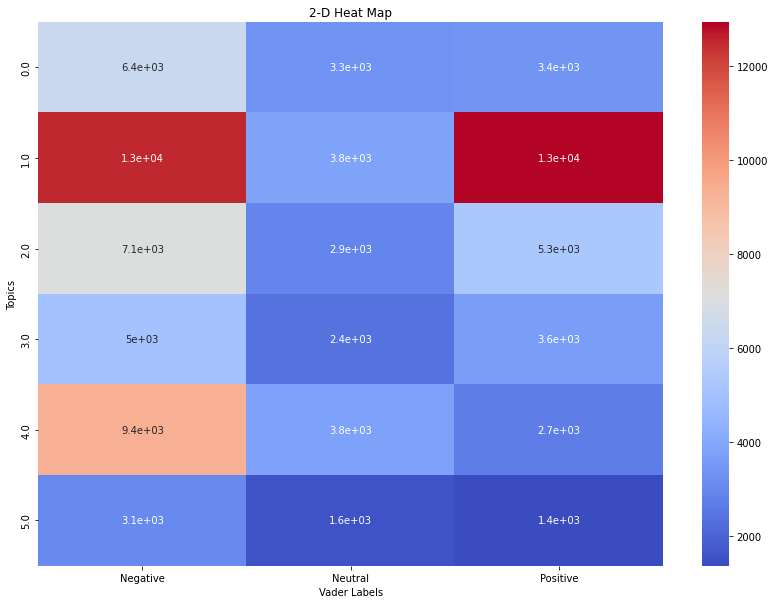

In [51]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

mp.figure(figsize=(14,10))
dataplot = sb.heatmap(CrosstabResult,cmap="coolwarm" ,annot= True)
  
# displaying heatmap
mp.title( '2-D Heat Map' )
mp.xlabel('Vader Labels')
mp.ylabel('Topics')
mp.show()



# linewidth = 0.5 , cmap = 'coolwarm' , cmap="coolwarm"